## Data Exploration on New York City Airbnb

### Abstract

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

#### about data 

This dataset has around 43566 observations in it with 18 columns and it is a mix between categorical and numeric values.




#### Importing the Libraries


In [19]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
sns.set()
%config InlineBackend.figure_format = 'svg'

#### Reading the dataset


In [32]:
df = pd.read_csv('new_york_city.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0,NaN
1,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1,NaN
2,14991,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3,NaN
3,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1,NaN
4,59709,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23,NaN


### Data preprocessing


In [33]:
def change_dtype(list1,typ):
    newlist = []
    for i in list1:
        try :
            newlist.append(typ(i))
        except:
             newlist.append(None)
    return newlist

In [34]:
# Split name columns based on "·" delimiter
split_columns = df['name'].str.split('·', expand=True)

# Rename the columns that splitted
split_columns.columns = ['property_Type', 'rating', 'bedrooms', 'beds', 'baths']
split_columns ['property_Type']= split_columns['property_Type'].str.split(' ',expand = True)[0]

split_columns['rating'] = split_columns['rating'].str.replace('★','')
split_columns['rating'] = split_columns['rating'].str.strip()
split_columns['rating'] = change_dtype(split_columns['rating'], float)

split_columns['beds'] = split_columns['beds'].str.strip()
split_columns['beds'] = split_columns['beds'].str.split(' ',expand = True)[0]
split_columns['beds'] = change_dtype(split_columns['beds'],int)

split_columns['bedrooms'] = split_columns['bedrooms'].str.strip()
split_columns['bedrooms'] = split_columns['bedrooms'].str.split(' ',expand = True)[0]
split_columns['bedrooms'] = change_dtype(split_columns['bedrooms'],int)

split_columns['baths'] = split_columns['baths'].str.strip()
split_columns['baths'] = split_columns['baths'].str.split(' ',expand = True)[0]
split_columns['baths'] = change_dtype(split_columns['baths'],float)

df = pd.concat([df, split_columns], axis=1)

df.drop('name',axis =1, inplace = True)

In [35]:
## Check for missing values in the dataframe and display the count in ascending order.
missing_values = df.isna()
missing_count = missing_values.sum().sort_values(ascending=True)

# view the proportion of missing values
proportion_missing = missing_values.sum() / len(df)
proportion_count = proportion_missing.sort_values(ascending=True)

missing_table = pd.concat([missing_count, proportion_count], axis=1)
missing_table.columns = ['Missing Count', 'Proportion']
missing_table

,Missing Count,Proportion
id,0,0.000000
property_Type,0,0.000000
number_of_reviews_ltm,0,0.000000
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
number_of_reviews,0,0.000000
longitude,0,0.000000
latitude,0,0.000000


In [36]:
df.drop(['license','rating','baths','beds','last_review','id','host_name'],axis = 1, inplace = True)

#### Different Neighbourhood groups


The following plot represents the count of Airbnb's in the different neighbourhood groups

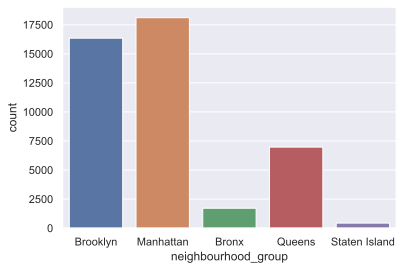

In [37]:
f,ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(data = df,x ='neighbourhood_group')
plt.show()

In [38]:
df.describe(include = np.number)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,bedrooms
count,4.356600e+04,43566.000000,43566.000000,43566.000000,43566.000000,43566.000000,33070.000000,43566.000000,43566.000000,43566.000000,41200.000000
mean,1.559275e+08,40.728677,-73.943917,225.216109,18.700271,26.368544,1.219748,30.934857,136.998256,7.882110,1.470947
std,1.655706e+08,0.057564,0.056336,818.738268,27.804388,57.740520,1.777084,99.108628,137.346191,18.250976,0.944145
min,1.678000e+03,40.500314,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,1.647671e+07,40.687650,-73.981990,80.000000,2.000000,1.000000,0.130000,1.000000,0.000000,0.000000,1.000000
50%,7.846297e+07,40.724524,-73.952720,136.000000,15.000000,5.000000,0.550000,1.000000,89.000000,1.000000,1.000000
75%,2.789252e+08,40.762750,-73.924150,228.000000,30.000000,24.000000,1.800000,5.000000,278.000000,8.000000,2.000000
max,5.180219e+08,40.911380,-73.710870,90120.000000,1250.000000,2024.000000,63.950000,569.000000,365.000000,1128.000000,21.000000


**the price column has a lot of variation due to outliers so we had to remove it**

In [39]:
low, high = df['price'].quantile([0.1,0.9])
df = df[df['price'].between(low, high)]

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

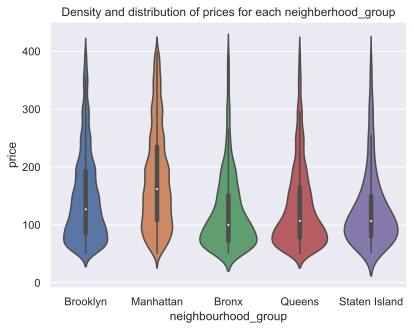

In [42]:
fig=sns.violinplot(data=df, x='neighbourhood_group', y='price')
fig.set_title('Density and distribution of prices for each neighberhood_group')

with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with 150 dollar as average price, followed by Brooklyn with 110 dollar per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all

#### Number of different room types

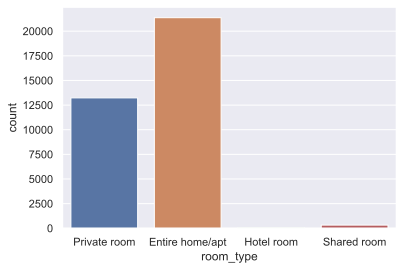

In [44]:
f,ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(data = df ,x ='room_type')
plt.show()

The maximum number of rooms listed on Airbnb are private rooms and entire home and apartments and a very small 
number of shared rooms and Hotel rooms are listed on Airbnb.



In [47]:
top_10_neighbourhood = df['neighbourhood'].value_counts().head(10)
sns.countplot(data=df, x='neighbourhood', order=top_cities.index, hue = 'room_type')


Bedford-Stuyvesant    2501
Williamsburg          2225
Harlem                1857
Upper East Side       1387
Midtown               1335
Hell's Kitchen        1314
Upper West Side       1309
Bushwick              1303
Crown Heights         1108
East Village          1047
Name: neighbourhood, dtype: int64

<Figure size 600x400 with 0 Axes>

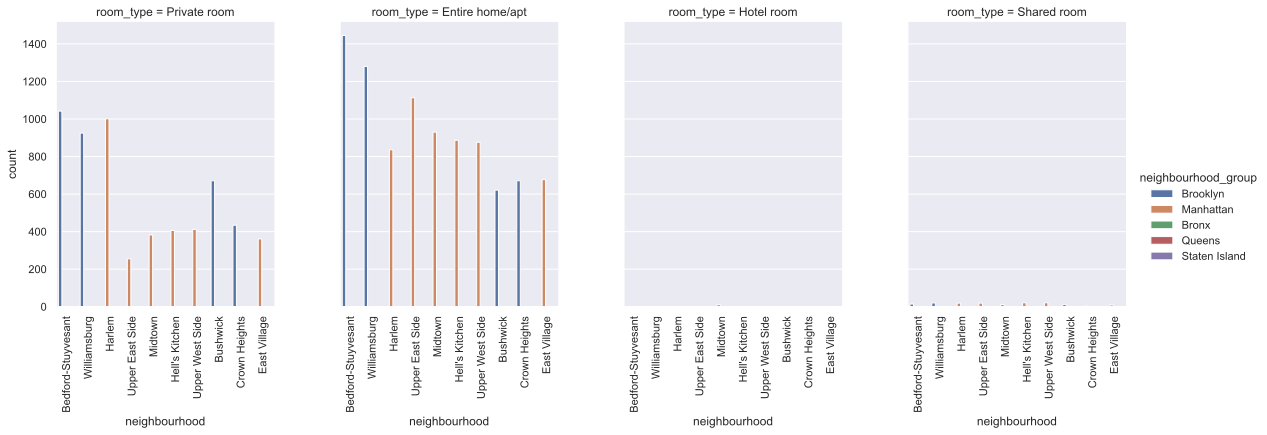

In [57]:

# Get the 10 most frequent cities
top_cities = df['neighbourhood'].value_counts().head(10)

# Create a countplot using Seaborn
plt.figure(figsize=(10,6))
fig = sns.catplot(data=df,x='neighbourhood',hue = 'neighbourhood_group' col='room_type',order= top_10_neighbourhood.index, kind='count')
fig.set_xticklabels(rotation=90)

plt.show()

The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations

([<matplotlib.axis.XTick at 0x24b124dbe90>,
 [Text(1, 0, '1'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40')])

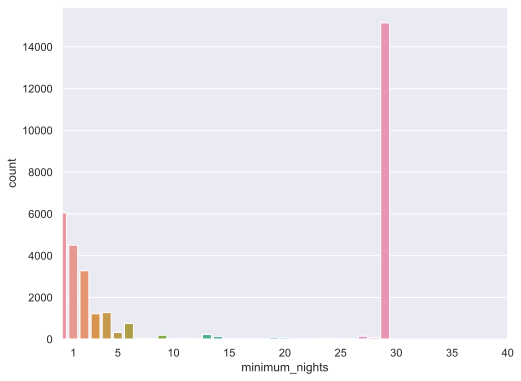

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'minimum_nights', data = df)
plt.xlim(0, 40)
tick = [1,5,10,15,20,25,30,35,40]
plt.xticks(tick, tick)

Most of the listings for minimum nights are less 5 days whereas some guests stay for about a month.



In [73]:
df['property_Type'].unique() 

array(['Rental', 'Condo', 'Townhouse', 'Loft', 'Home', 'Boutique',
       'Guesthouse', 'Guest', 'Serviced', 'Houseboat', 'Bed', 'Place',
       'Boat', 'Cottage', 'Cave', 'Tiny', 'Bungalow', 'Floor', 'Hostel',
       'Resort', 'casa', 'Villa', 'Hotel', 'Farm', 'Vacation', 'Earthen',
       'Aparthotel', 'Lighthouse', 'Barn', 'Camper/RV', 'kezhan',
       'Castle', 'Dome'], dtype=object)

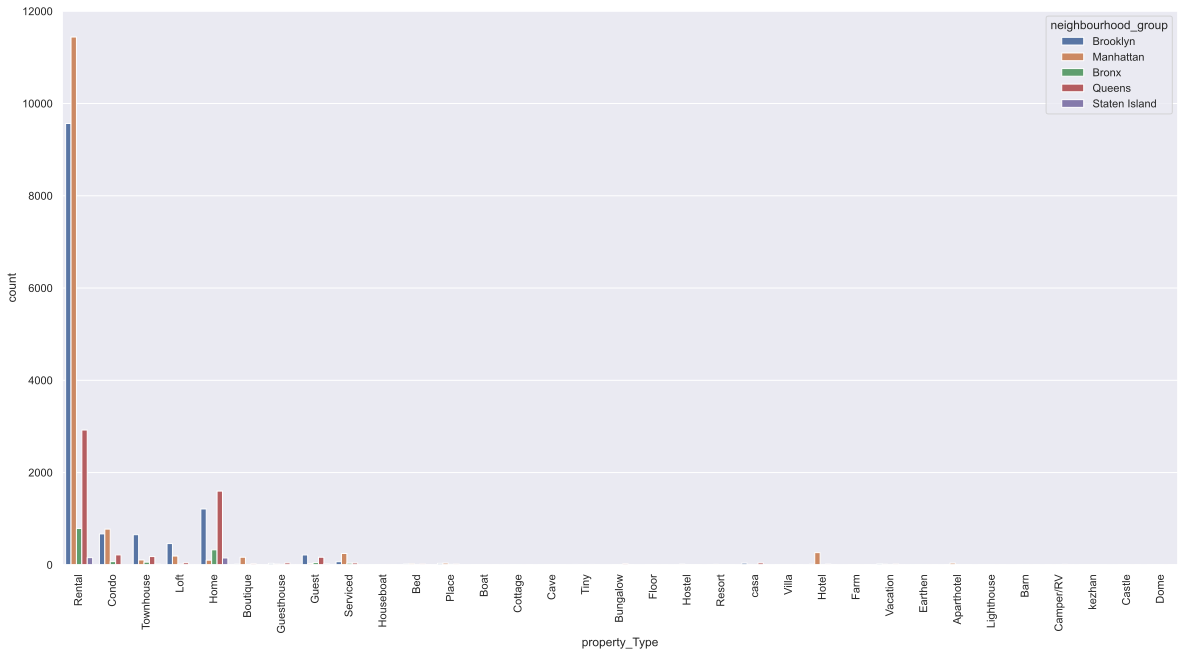

In [81]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'property_Type', hue = 'neighbourhood_group',data = df)

plt.xticks(rotation=90)
plt.show()


this plot show that Most people in Brooklyn and Manhattan prefer to rent while in queens prefers to stay at home 

**notice** that the other property_type there's no significant difference between them so we can remove it

In [85]:
# plt.figure(figsize= (10,8))
# plt.scatter(df.longitude, df.latitude, c = df.availability_365, alpha = 0.7,cmap ='summer',edgecolor = 'black')
# c_bar = plt.colorbar()
# c_bar.set_label('Availability')

It can be seen that availability is almost evenly distributed throughout

### observations 

- with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with 150 dollar as average price, followed by Brooklyn with 110 dollar per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all


- The maximum number of rooms listed on Airbnb are private rooms and entire home and apartments and a very small number of shared rooms and Hotel rooms are listed on Airbnb.


- The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations


- this plot show that Most people in Brooklyn and Manhattan prefer to rent while in queens prefers to stay at home 
- It can be seen that availability is almost evenly distributed throughout


### if you are real estate owner What decisions can you make based on these observations?

**Pricing Strategy:**

Considering that Manhattan has the highest range of prices and is a popular destination, you might consider pricing your properties competitively in line with the average price for the borough.
For properties in other boroughs like Brooklyn, you could set prices slightly below the Manhattan average to attract budget-conscious travelers.

**Property Type Allocation:**
Since private rooms and entire homes/apartments are the most popular listing types, you could focus on investing in and managing properties that fit these categories.
Given that shared rooms and hotel rooms have limited demand, you might avoid investing in these types of properties unless there's a specific niche market you're targeting.

**Property Location:**

If most of the top 10 listing-populated neighborhoods are concentrated in Manhattan and Brooklyn, you might prioritize investing in properties in these boroughs, as they are highly traveled destinations.
Consider the type of properties that are more prevalent in these neighborhoods (e.g., entire homes/apartments) to align your investment with local demand.

**Marketing and Positioning:**

Leverage the preferences of guests who prefer to rent in Brooklyn and Manhattan by highlighting the unique features and attractions of these boroughs in your property listings.
Emphasize the benefits of staying in a home-like setting for Queens properties, catering to guests who prefer a "stay at home" experience.

**Occupancy and Availability:**

If availability is evenly distributed throughout the year, you could plan for consistent occupancy by maintaining a well-balanced booking schedule.
Monitor the high-demand periods in the popular neighborhoods to adjust pricing and availability during peak travel seasons.

**Bronx and Staten Island Investment:**

As Bronx is the cheapest borough, you might explore investment opportunities there, targeting budget-conscious travelers who are willing to compromise on location for affordability.
Consider Staten Island for investment if you're looking for potentially lower-priced properties with the potential to attract a specific type of traveler.

**Competitive Differentiation:**

Use the insights gained from the observations to differentiate your properties from competitors. Highlight features that align with the preferences of your target guests, such as private spaces in Manhattan or Brooklyn.
